# RNN(순환 신경망: Recurrent Neural Network) 과 빌딩 연습

_이히히 알엔엔이당 이히히힣_

RNN은 순환 신경망이다. 시퀀스 데이터(sequence) 데이터를 사용한다. 

이전의 신경망은 입력 데이터를 사용한 후, 출력된 결과가 다시 사용되는 일은 없는 **피드포워드(feedforward) 신경망**이었다.

반면 순환 신경망은 출력된 결과가 다음 시점에서 사용된다. 즉, 출력 결과를 다음 시점까지 기억했다가 사용하게 된다. 

보통 시퀀스 데이터는 흔히 얘기하는 **시계열(time series)데이터**이다. 이는 시점에 따라 데이터가 달라지는 것을 의미한다.

특정 시점의 데이터가 아니라, 시간의 흐름에 따라 데이터를 수집하여 만들어진 데이터이다. 따라서 각 데이터 포인트의 (수집)시점이 서로 다르다.

따라서 시계열 데이터나, 자연어 처리 분야에서 많이 사용된다.

$$ 수식 $$

---
---

### RNN 기본구조

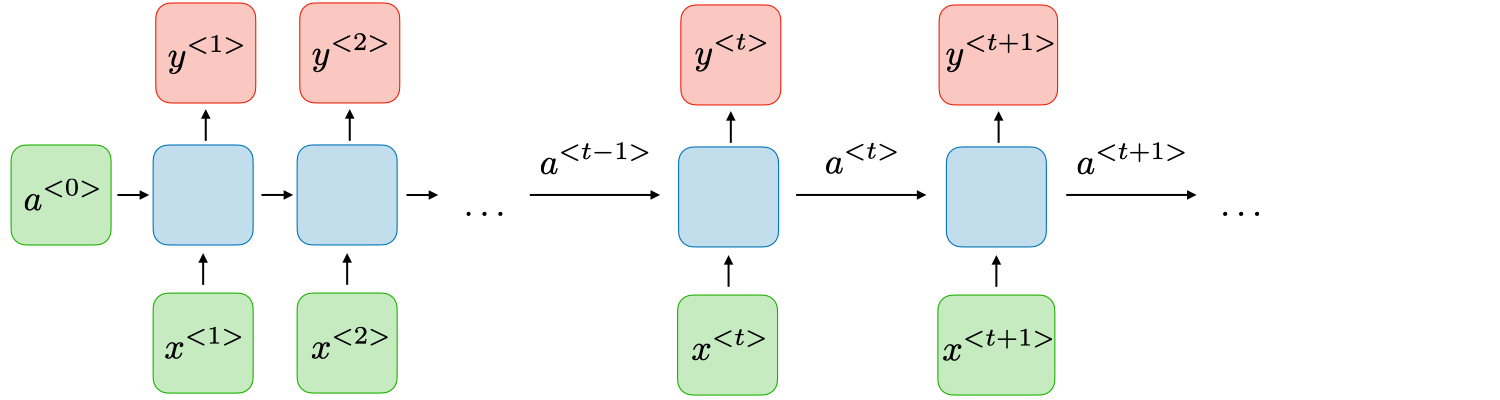
_출처: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks_

파란색 상자가 해당 시점의 은닉층이다. 은닉층으로부터 나온 값은 두 방향으로 한 방향은 출력값으로 이어지고, 다른 한 방향은 다시 입력층으로 되돌아가는 방향이 있다. 

### 종류

순환 신경망에는 다양한 형태가 존재한다. 이미지의 출처를 따라가면 아름답게 정리해둔 이미지와 친절한 설명이 있다.

1. one-to-one : 입력값과 출력값이 하나
2. many-to-one : 입력값은 여러 개(여러 시점)인 반면 출력값은 마지막 하나 > Sentiment classification
3. one-to-many : 입력값은 하나이지만 출력값은 여러 개(하나의 시퀀스) > Music generation
4. many-to-many : 입력값과 출력값 모두 여러 개 > Name entity recognition
5. many-to-many : 입력값과 출력값 모두 여러 개이지만, 입력값과 출력값의 시점 차이가 존재하는 형태 > Machine translation

---
---

### LSTM(Long Short Term Memory)

순환 신경망은 은닉층을 거친 결괏값을 **재사용**하기 때문에 그래디언트 소실문제나 그래디언트 폭주 문제(exploding gradient problem)이 발생할 수 있다.

이전 데이터에서 일부 편파적인 경향을 그대로 받게 되는 것이라고 생각하면 된다.

따라서 **결괏값이 다음 시점으로 넘어갈 때 결괏값을 넘길지 말지 결정하는 단계가 추가된 LSTM** 방식을 사용할 수 있다.

1. 입력 게이트(input gate)는 셀 상태를 업데이트 하는 역할을 한다. : $i_t, g_t$
    입력층 데이터 벡터에 가중치 행렬를 곱한 값과 은닉 유닛에 가중치를 곱한 값을 더하고 편향을 더한 후, 한쪽은 시그모이드, 한쪽은 하이퍼볼릭 탄젠트를 취한다.
2. 삭제 게이트(forget gate)는 통과할 정보와 억제할 정보를 결정한다. : $f_t$
    입력 데이터 벡터에 가중치 행렬을 곱한 값과 은닉 유닛에 가중치를 곱한 값을 더하고 편향을 더한 후, 시그모이드 함수를 취한다.
3. 출력 게이트(output gate)는 은닉 유닛의 출력값을 생성한다. (이전에 은닉 유닛을 곱한다는 것이 여기의 값이다.) : $o_t$
    입력 데이터 벡터에 가중치 행렬을 곱한 값에 은닉 유닛에 가중치 행렬을 곱한 값을 더하고 편향을 더한다. 그리고 시그노이드 함수를 취한다. 
4. t시점에서의 셀상태 : $c_t$
    이전 시점의 셀 상태 $c_{t-1}$ 와 삭제 게이트 출력값 $f_t$ 를 원소곱한다. 
    입력게이트를 통해 생성된 $i_t$와 $g_t$를 원소곱한다. 
    마지막으로 지금 구한 벡터를 원소합 하면 최종 셀 상태 $c_t$를 구할 수 있다.
5. 현재 시점(타임 스텝)에서의 은닉 유닛을 출력한다. $h_t$
    출력 게이트 값 $o_t$와 해당 시점의 셀 상태 $c_t$의 하이퍼볼릭 탄젠트 값을 원소곱한 값이다.

---
### GRU(Gated Recurrent Unit)

LSTM과 비슷한 원리지만, 좀 더 간소화된 방식이고 계산이 간편하다. 반면 학습능력은 LSTM보다 다소 낮다. 

LSTM과 다르게 **이전 시점에서 받는 벡터가 $h_t$하나이다.** (원래는 받는 게 셀 상태 값과 은닉 유닛값 으로 두 가지가 있었다.)

또한 **하나의 벡터 $z_t$가 삭제 게이트와 입력 게이트 모두 제어한다.** 1을 출력하면 삭제 게이트가 열리고 입력 게이트가 닫히며, 0을 출력하면 삭제 게이트가 닫히고 입력게이트가 열린다. 

GRU에는 출력 게이트가 따로 있지 않고, 전체 상태 벡터가 매 시점 출력된다. 

대신 이전 상태의 어느 부분이 노출될지 제어하는 새로운 값 $r_t$가 있다.



##### 12.5.4 순환 신경망 실습

순환 신경망을 이용하여 영화 리뷰 감성 분석을 해본다 (자연어다.!...?)

# Random seed setting and Load Data, Libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [2]:
# data load
# imdb data는 텐서플로에서 제공하는 영화 데이터베이스 데이터 셋이다. 불러올 때 트레이닝/테스트를 나누어서 불러올 수 있다.
# 자주 쓰이는 단어 2000개만 사용하겠다는 의미이다.

from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.imdb.load_data(num_words = 2000)

 참조: https://keras.io/api/datasets/imdb/
 ```
 tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
    **kwargs
)
```

In [3]:
# Origin data dimension check

print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(25000,)
(25000,)
(25000,)
(25000,)


모두 25000 개의 데이터로 존재한다.

# dividing train data and validation data

25000개중 20000개를 트레이닝 데이터로 지정한다.

In [4]:
# set the validation data (20000/250000)
X_train = X_tn0[0:20000]
y_train = y_tn0[0:20000]
X_valid = X_tn0[20000:25000]
y_valid = y_tn0[20000:25000]

In [5]:
# checking
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


# Feature data and target data check for reshaping

## feature data shape

In [6]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


## target data shape